# Fine-tuning a Vision Model for Cat or Dog Breed Classification


In [ ]:
!pip install -U fastai --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastai.vision.all import *
from collections import Counter
import matplotlib.pyplot as plt
import random

In [ ]:
# Download the data
path = untar_data(URLs.PETS)/'images'
files = get_image_files(path)
print(f"Dataset path: {path}")
print(f"Total images: {len(files)}\n")

Dataset path: /root/.fastai/data/oxford-iiit-pet/images
Total images: 7390



In [ ]:
# Inspect the data layout
print("Example files:", path.ls()[:5])

Example files: [Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_70.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_140.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_147.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_190.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_7.jpg')]


In [ ]:
image_files = get_image_files(path)
print(f"Total images: {len(image_files)}")

Total images: 7390


In [ ]:
cat_images = [f for f in image_files if f.name[0].isupper()]
dog_images = [f for f in image_files if f.name[0].islower()]
print(f"\nTotal cat images: {len(cat_images)}")
print(f"Total dog images: {len(dog_images)}")


Total cat images: 2400
Total dog images: 4990


In [ ]:
# Decide how to create the datablock
label_func = RegexLabeller(r'(.+)_\d+.jpg$')
overall_counts = Counter(label_func(f.name) for f in files)
print("Overall class distribution (all images):")
print(overall_counts, "\n")

Overall class distribution (all images):
Counter({'Siamese': 200, 'pomeranian': 200, 'Birman': 200, 'american_bulldog': 200, 'boxer': 200, 'samoyed': 200, 'Bombay': 200, 'miniature_pinscher': 200, 'Maine_Coon': 200, 'chihuahua': 200, 'english_setter': 200, 'Bengal': 200, 'wheaten_terrier': 200, 'german_shorthaired': 200, 'american_pit_bull_terrier': 200, 'shiba_inu': 200, 'Russian_Blue': 200, 'newfoundland': 200, 'Sphynx': 200, 'havanese': 200, 'Ragdoll': 200, 'english_cocker_spaniel': 200, 'yorkshire_terrier': 200, 'keeshond': 200, 'Egyptian_Mau': 200, 'British_Shorthair': 200, 'saint_bernard': 200, 'beagle': 200, 'pug': 200, 'great_pyrenees': 200, 'Persian': 200, 'basset_hound': 200, 'japanese_chin': 200, 'leonberger': 200, 'Abyssinian': 200, 'scottish_terrier': 199, 'staffordshire_bull_terrier': 191}) 



In [ ]:
cat_labels = [f.name.split('_')[0] for f in image_files if f.name[0].isupper()]
dog_labels = [f.name.split('_')[0] for f in image_files if f.name[0].islower()]
cat_counts = Counter(cat_labels)
dog_counts = Counter(dog_labels)
print(f"Total cat breeds: {len(cat_counts)}")
print("Cat breed examples:", cat_counts.most_common(5))
print(f"\nTotal dog breeds: {len(dog_counts)}")
print("Dog breed examples:", dog_counts.most_common(5))

Total cat breeds: 12
Cat breed examples: [('Siamese', 200), ('Birman', 200), ('Bombay', 200), ('Maine', 200), ('Bengal', 200)]

Total dog breeds: 23
Dog breed examples: [('american', 400), ('english', 400), ('pomeranian', 200), ('boxer', 200), ('samoyed', 200)]


In [ ]:
# Create a DataBlock and DataLoaders by defining the input/output blocks, how to collect items, 
# how to extract labels/attributes, and the item- and batch-level transforms to apply.
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),                           
    get_items=get_image_files,                                     
    splitter=RandomSplitter(valid_pct=0.2, seed=42),               
    get_y=using_attr(RegexLabeller(r"(.+)_\d+\.jpg$"), "name"),    
    item_tfms=Resize(460),                                         
    batch_tfms=aug_transforms(size=224, max_rotate=2, max_zoom=1.05), 
)

# Create dataloaders
dls = dblock.dataloaders(path, bs=32)

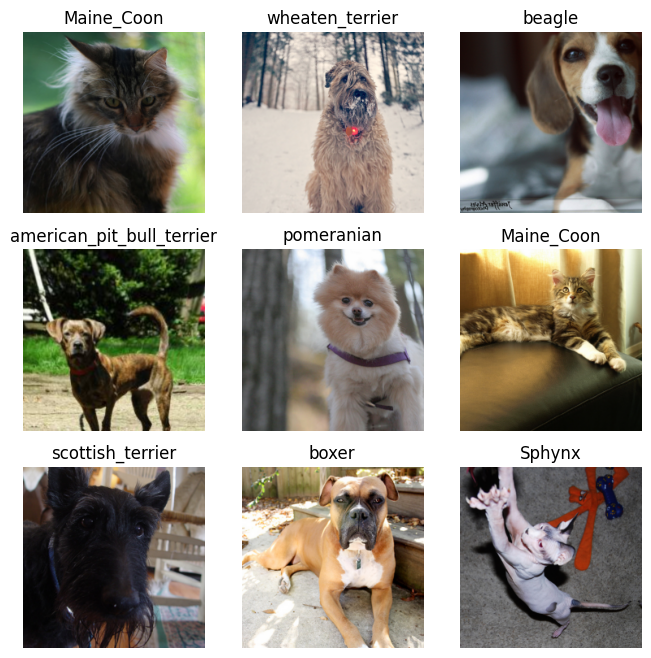

In [ ]:
# Inspect the DataBlock via dataloader
dls.show_batch(max_n=9, figsize=(8, 8))

In [ ]:
# Check the labels
print("Classes:", dls.vocab)
print("Number of classes:", len(dls.vocab))

Classes: ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
Number of classes: 37


In [ ]:
# Summarize the DataBlock
print("\nDataBlock Summary:")
dblock.summary(path)


DataBlock Summary:
Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}


Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/keeshond_2.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=334x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

    starting from
      /root/.fastai/data/oxford-iiit-pet/images/keeshond_2.jpg
    applying partial gives
      keeshond
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
 gives
      TensorCategory(24)

Final sample: (PILImage mode=RGB size=334x500, TensorCategory(24))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Setti

In [ ]:
# Check batch shapes for confirmation
xb, yb = dls.one_batch()
print("Image batch shape:", xb.shape)
print("Label batch shape:", yb.shape)

Image batch shape: torch.Size([32, 3, 224, 224])
Label batch shape: torch.Size([32])


In [ ]:
# Train a simple model
# Create a benchmark learner
learn = vision_learner(
    dls,
    resnet34,
    metrics=accuracy,
)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 206MB/s]


Using learning rate (valley): 5.75e-04


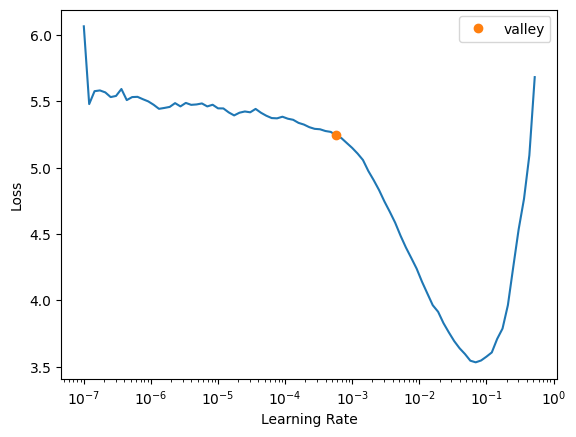

In [ ]:
# Learning Rate Finder
# Finder Algorithm
lr_steep = learn.lr_find().valley
print(f"Using learning rate (valley): {lr_steep:.2e}")

In [ ]:
# Transfer Learning
learn.freeze()
learn.fit_one_cycle(1, lr_steep)

epoch,train_loss,valid_loss,accuracy,time
0,1.140363,0.388935,0.891746,01:09


In [ ]:
# Discriminative Learning Rates
learn.unfreeze()
# Using slice(smaller_lr, larger_lr) for discriminative learning
# Earlier layers (smaller lr) - Later layers (larger lr)
learn.fit_one_cycle(6, lr_max=slice(1e-6, lr_steep))

epoch,train_loss,valid_loss,accuracy,time
0,0.633298,0.258563,0.916779,01:25
1,0.504808,0.206052,0.934371,01:06
2,0.331410,0.193544,0.941137,01:05
3,0.247989,0.171645,0.949256,01:05
4,0.177660,0.170321,0.945196,01:05
5,0.157394,0.173829,0.948579,01:06


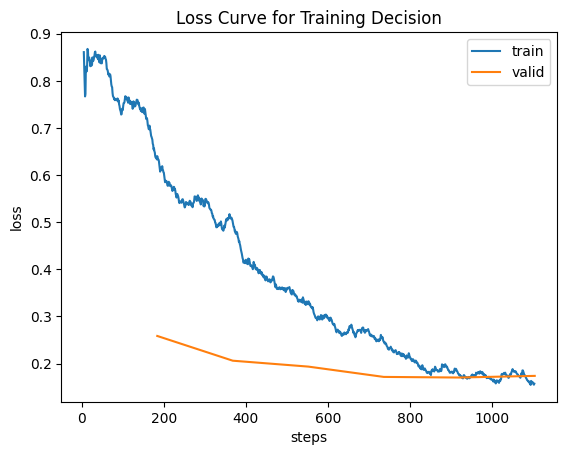

In [ ]:
# Deciding the Number of Training Epochs
# Check if more epochs would help
learn.recorder.plot_loss()
plt.title("Loss Curve for Training Decision")
plt.savefig('loss_curve.png')

In [ ]:
# Determine if more training would help
# If the validation loss is still decreasing, we should train more
last_losses = learn.recorder.values[-1]
print(f"Final training loss: {last_losses[0]}, validation loss: {last_losses[1]}")
if last_losses[0] > last_losses[1] * 1.2:  # Training loss still higher than validation
    print("Model could benefit from more training epochs")
    # Add more epochs if needed
    print("Adding 2 more training epochs")
    learn.fit_one_cycle(2, lr_max=slice(1e-6, lr_steep/2))
else:
    print("Model appears to be well-trained with current epochs")

Final training loss: 0.15739427506923676, validation loss: 0.17382904887199402
Model appears to be well-trained with current epochs


In [ ]:
# Model Capacity
print("\nEvaluating model capacity needs")
acc = learn.validate()[1]
print(f"Current model accuracy: {acc:.4f}")

if acc < 0.9:
    print("Accuracy below target. Trying higher capacity model (resnet50)")
    dls = dblock.dataloaders(path, bs=16)  # Reduce batch size

    # Use mixed precision for efficiency 
    learn = vision_learner(dls, resnet50, metrics=accuracy)
    learn.to_fp16()  # Mixed precision training

    # Train again with the new model
    lr_steep = learn.lr_find().valley
    learn.freeze()
    learn.fit_one_cycle(1, lr_steep)
    learn.unfreeze()
    learn.fit_one_cycle(5, lr_max=slice(1e-6, lr_steep))
else:
    print("Current model capacity (resnet34) appears sufficient")


Evaluating model capacity needs


Current model accuracy: 0.9486
Current model capacity (resnet34) appears sufficient


In [ ]:
# Interpret the model
# Save the model
learn.save('model_weights')

Path('models/model_weights.pth')

In [ ]:
# Create interpretation
interp = ClassificationInterpretation.from_learner(learn)

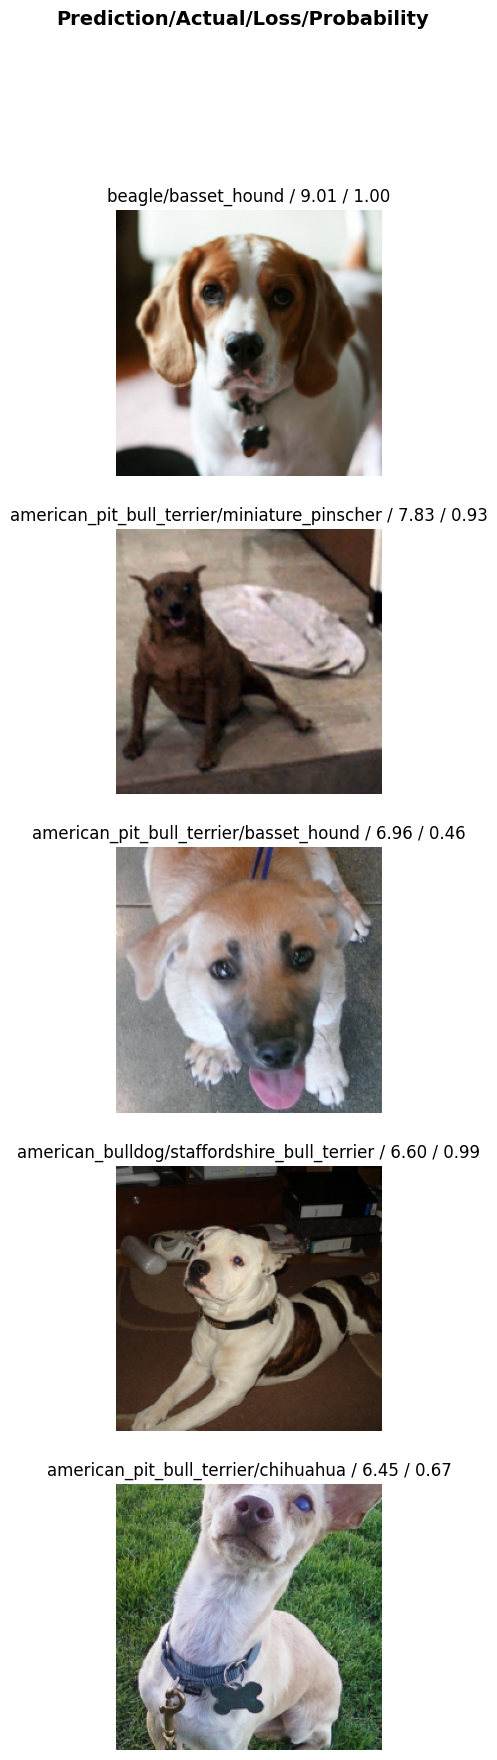

In [ ]:
# Show top losses
interp.plot_top_losses(k=5, nrows=5, ncols=1, figsize=(5, 20))
plt.savefig('top_losses.png')

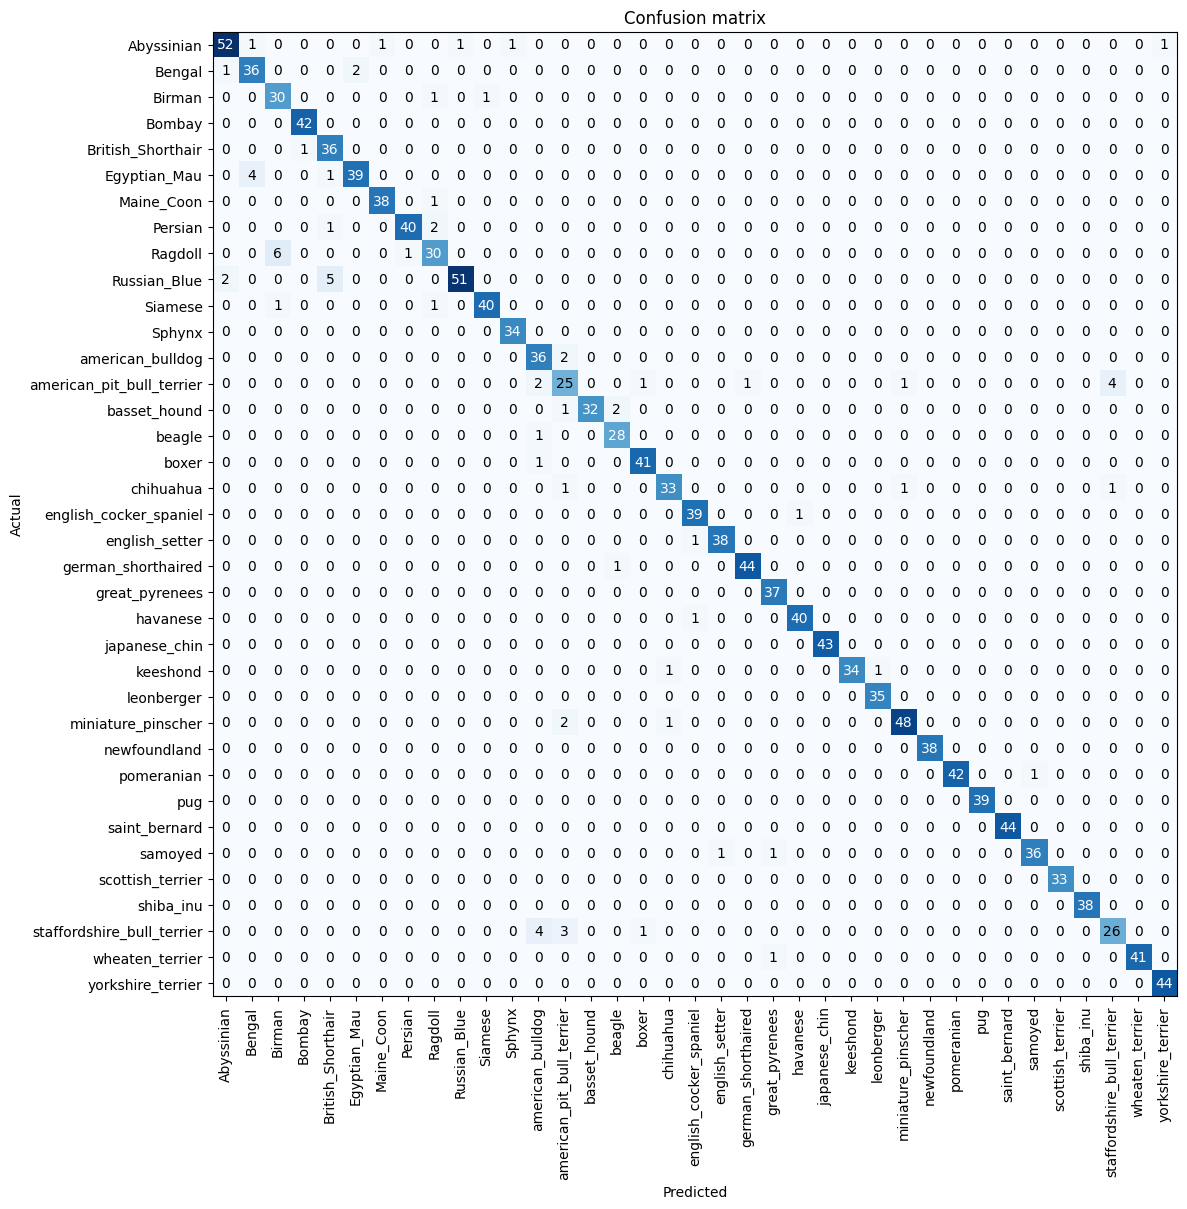

In [ ]:
# Confusion matrix
interp.plot_confusion_matrix(figsize=(12, 12), dpi=100)
plt.savefig('confusion_matrix.png')

In [ ]:
# Print classification report
interp.print_classification_report()

                            precision    recall  f1-score   support

                Abyssinian       0.95      0.91      0.93        57
                    Bengal       0.88      0.92      0.90        39
                    Birman       0.81      0.94      0.87        32
                    Bombay       0.98      1.00      0.99        42
         British_Shorthair       0.84      0.97      0.90        37
              Egyptian_Mau       0.95      0.89      0.92        44
                Maine_Coon       0.97      0.97      0.97        39
                   Persian       0.98      0.93      0.95        43
                   Ragdoll       0.86      0.81      0.83        37
              Russian_Blue       0.98      0.88      0.93        58
                   Siamese       0.98      0.95      0.96        42
                    Sphynx       0.97      1.00      0.99        34
          american_bulldog       0.82      0.95      0.88        38
 american_pit_bull_terrier       0.74      0.74

In [ ]:
# Export model
from google.colab import files
files.download('models/model_weights.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from fastai.vision.all import get_image_files

# Restore correct `files`
files = get_image_files(path)

In [ ]:
def predict_breed(img_path):
    """Make a prediction on a new image"""
    img = PILImage.create(img_path)
    pred_class, pred_idx, probabilities = learn.predict(img)
    return {
        "predicted_breed": pred_class,
        "confidence": probabilities[pred_idx].item(),
        "all_probabilities": {c: probabilities[i].item() for i, c in enumerate(learn.dls.vocab)}
    }

In [ ]:
# Example usage
print("\nExample prediction:")
sample_img = random.choice(files)
prediction = predict_breed(sample_img)
print(f"Sample image: {sample_img.name}")
print(f"Predicted breed: {prediction['predicted_breed']}")
print(f"Confidence: {prediction['confidence']:.4f}")

print("\nModel training and evaluation complete!")


Example prediction:


Sample image: British_Shorthair_59.jpg
Predicted breed: British_Shorthair
Confidence: 1.0000

Model training and evaluation complete!
